## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**Goal is to analyse the data based off the 538 article and see if it reachs a similar conclusion. We will be using pandas and visualization libraries to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

**Article:**

 [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

**The Data**

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

Importing all required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.simplefilter('ignore')

Exploring fandango ratings

In [7]:
fandango = pd.read_csv('fandango_scrape.csv')

In [8]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [9]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [10]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Visualization the relationship between popularity of a film and its rating. Creating a scatterplot for the same**

<Axes: xlabel='RATING', ylabel='VOTES'>

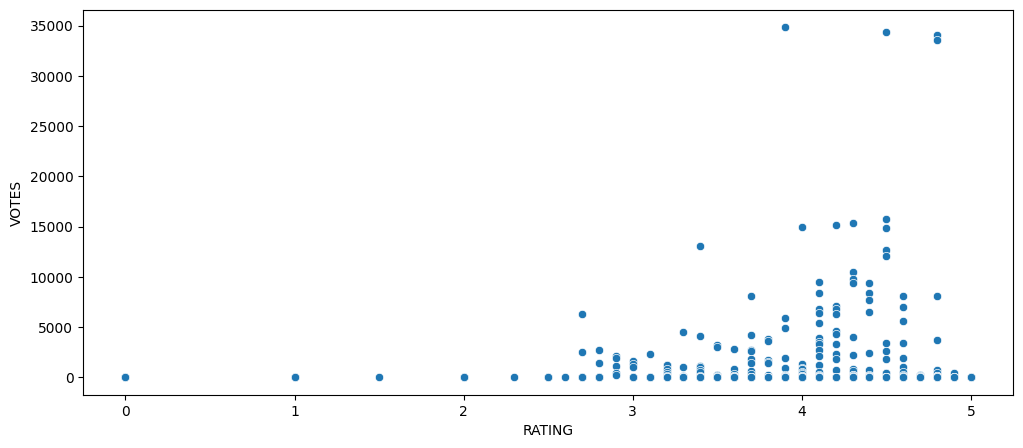

In [11]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

In [12]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Creating a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [13]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

In [14]:
fandango['YEAR'] = fandango['YEAR'].str.strip(')')


In [15]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**Number of movies on fandango per year**

In [16]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

**Visualizing the count of movies per year with a plot:**

<Axes: xlabel='YEAR', ylabel='count'>

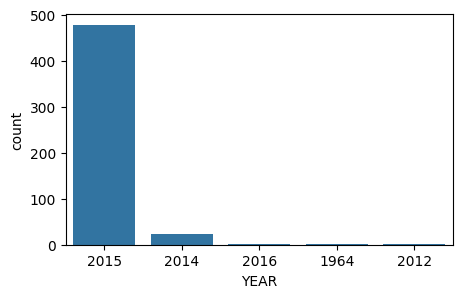

In [18]:
plt.figure(figsize=(5,3))
sns.countplot(data=fandango,x='YEAR')

**Top 10 Movies based on votes**

In [19]:
fandango.nlargest(n=10,columns='VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Number of moives with zero votes

In [20]:
len(fandango[fandango['VOTES'] == 0])

69

**DataFrame only containing reviewed films**

In [21]:
reviewed = fandango[fandango['VOTES'] > 0]

----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user.**

**Creating  KDE plots (that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).**

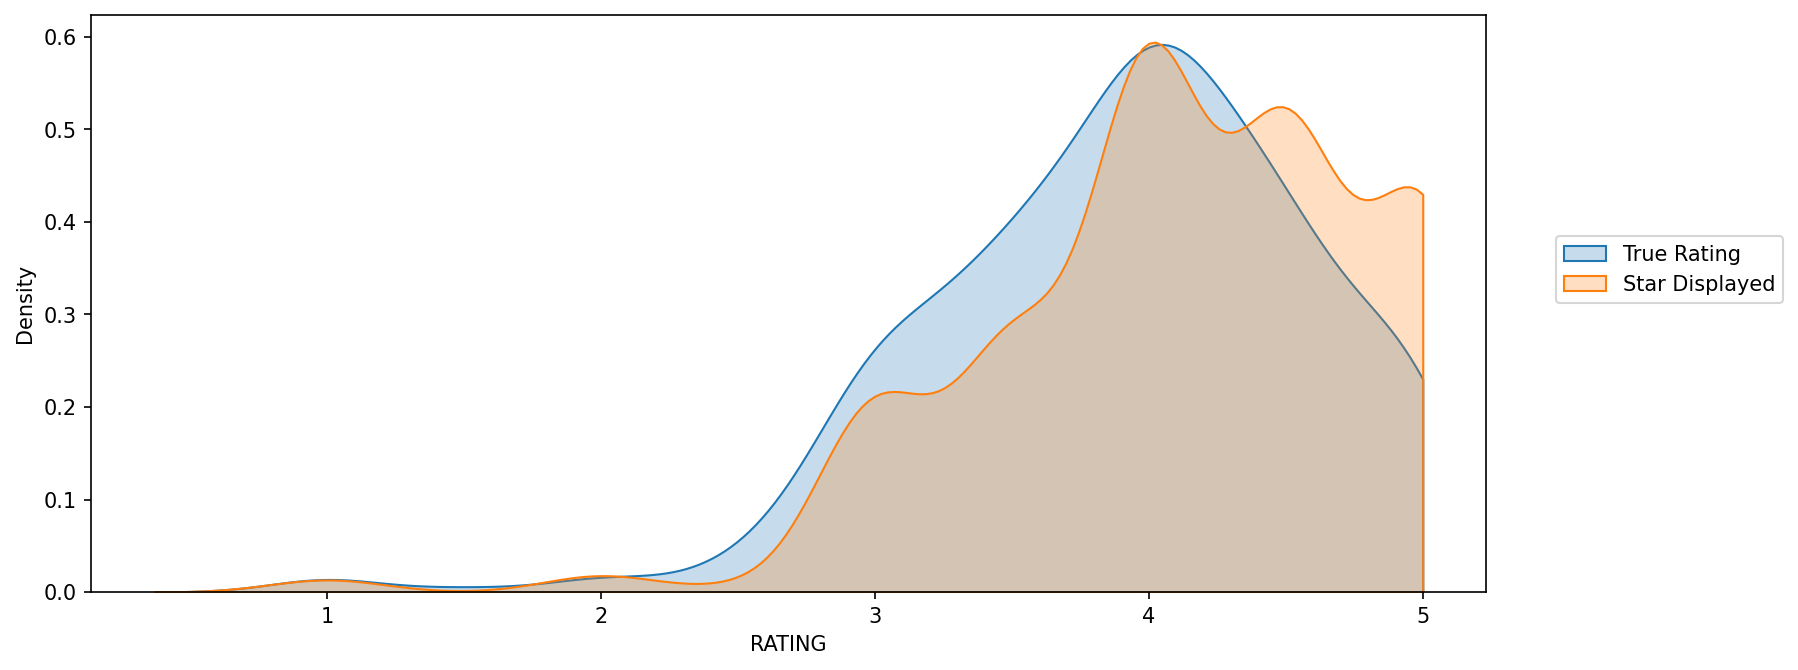

In [22]:
plt.figure(figsize=(12,5),dpi=150)
sns.kdeplot(data=reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=reviewed,x='STARS',clip=[0,5],fill=True,label='Star Displayed')
plt.legend(loc=(1.05,0.5))

**Difference between stars and ture rating**

In [23]:
reviewed['STAR_DIFF'] = reviewed['STARS'] - reviewed['RATING']

In [24]:
reviewed['STAR_DIFF'].round(2)

0      0.1
1      0.0
2      0.2
3      0.2
4      0.0
      ... 
430    0.0
431    0.0
432    0.0
433    0.0
434    0.0
Name: STAR_DIFF, Length: 435, dtype: float64

**Creating a count plot to display the number of times a certain difference occurs:**

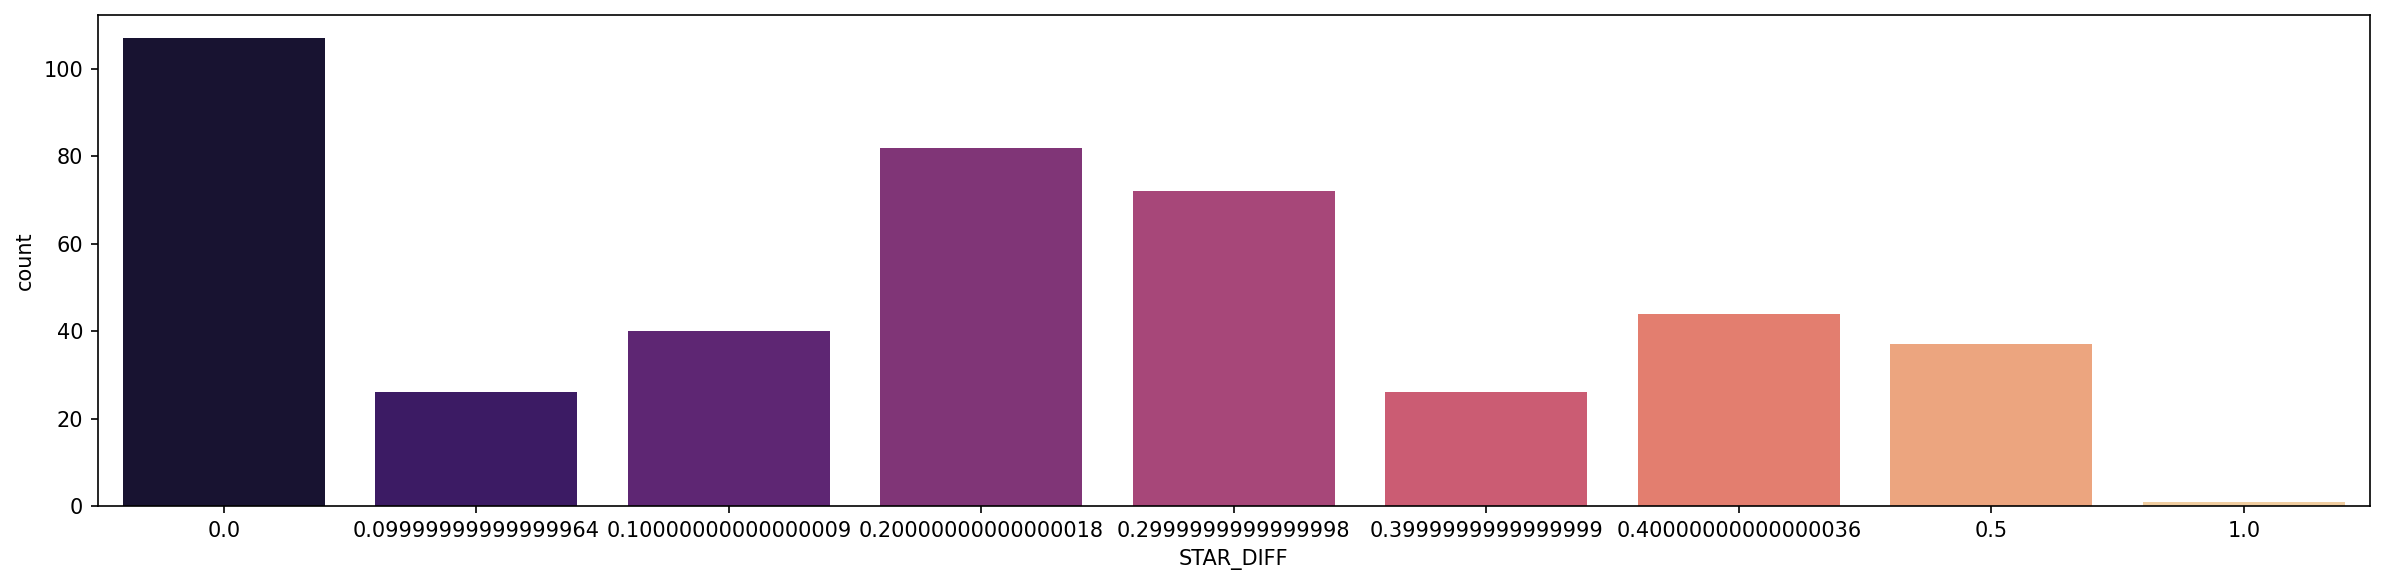

In [25]:
plt.figure(figsize=(16,4),dpi=150)
sns.countplot(data=reviewed,x='STAR_DIFF',palette='magma')
plt.tight_layout()

In [26]:
reviewed[reviewed['STAR_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Ratings to Other Sites

Comparing the scores from Fandango to other movies sites and see how they compare.

In [27]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [28]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [29]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [30]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomato

**Creating a scatter plot between Rotten tomato critics ratin to user rating**

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

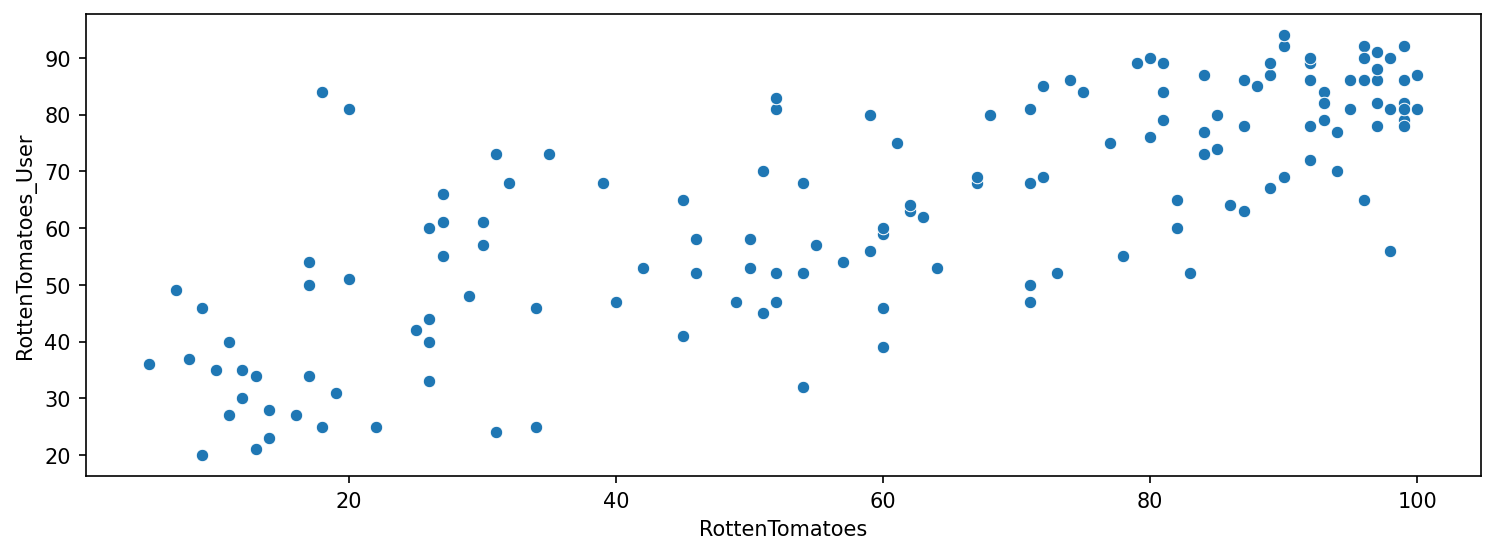

In [31]:
plt.figure(figsize=(12,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

In [32]:
all_sites['Rotten_DIFF'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [33]:
all_sites['Rotten_DIFF']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_DIFF, Length: 146, dtype: int64

In [34]:
all_sites['Rotten_DIFF'].abs().mean()

15.095890410958905

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

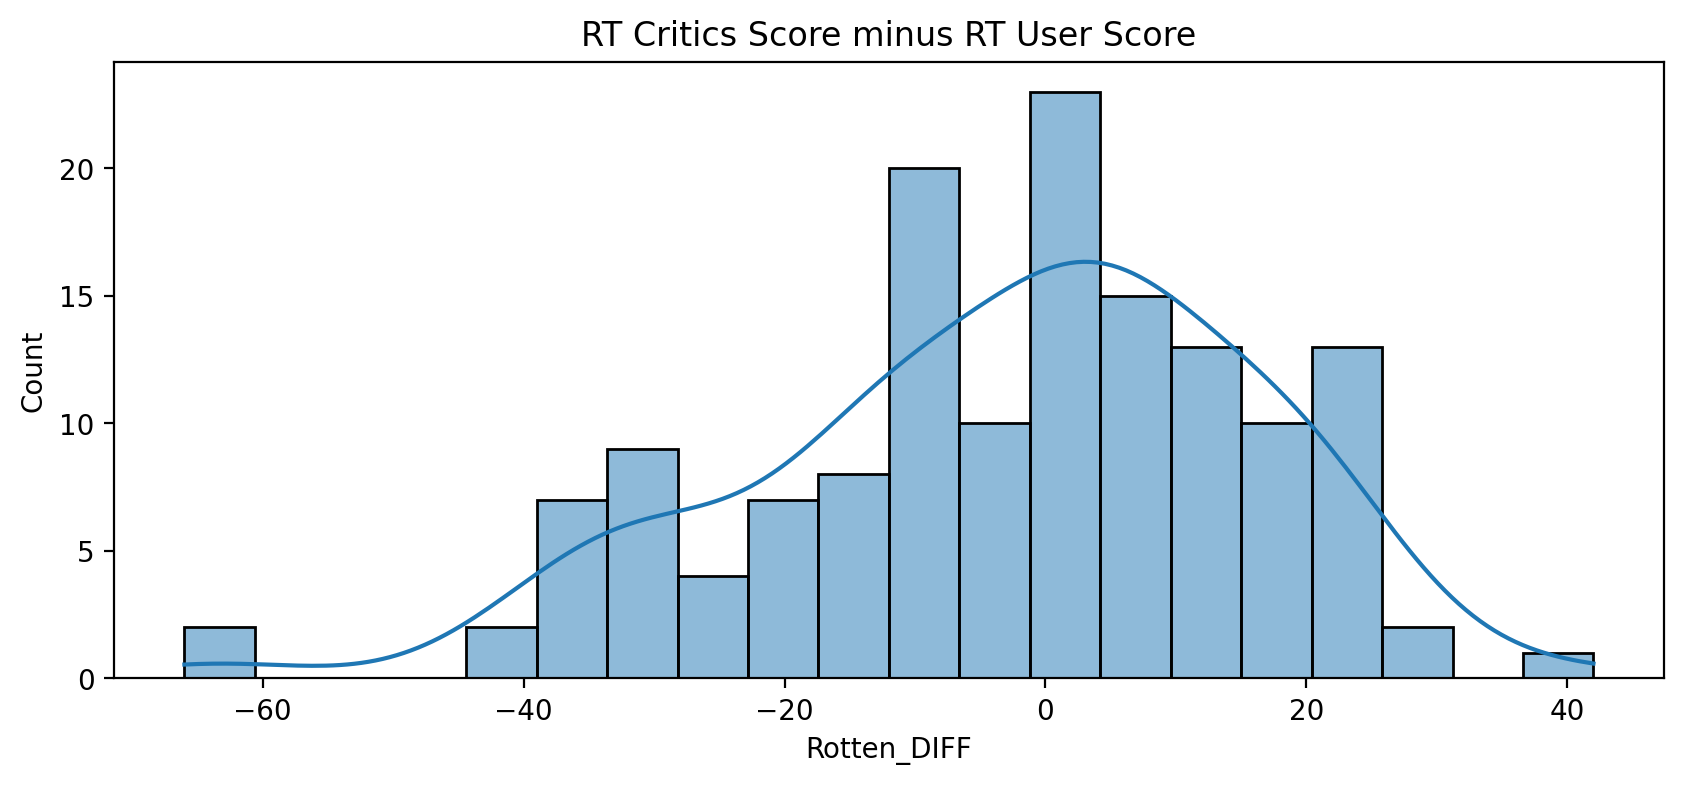

In [35]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_DIFF',kde=True,bins=20)
plt.title("RT Critics Score minus RT User Score")

Text(0.5, 1.0, 'Abs Difference Between RT Critics and RT User Score')

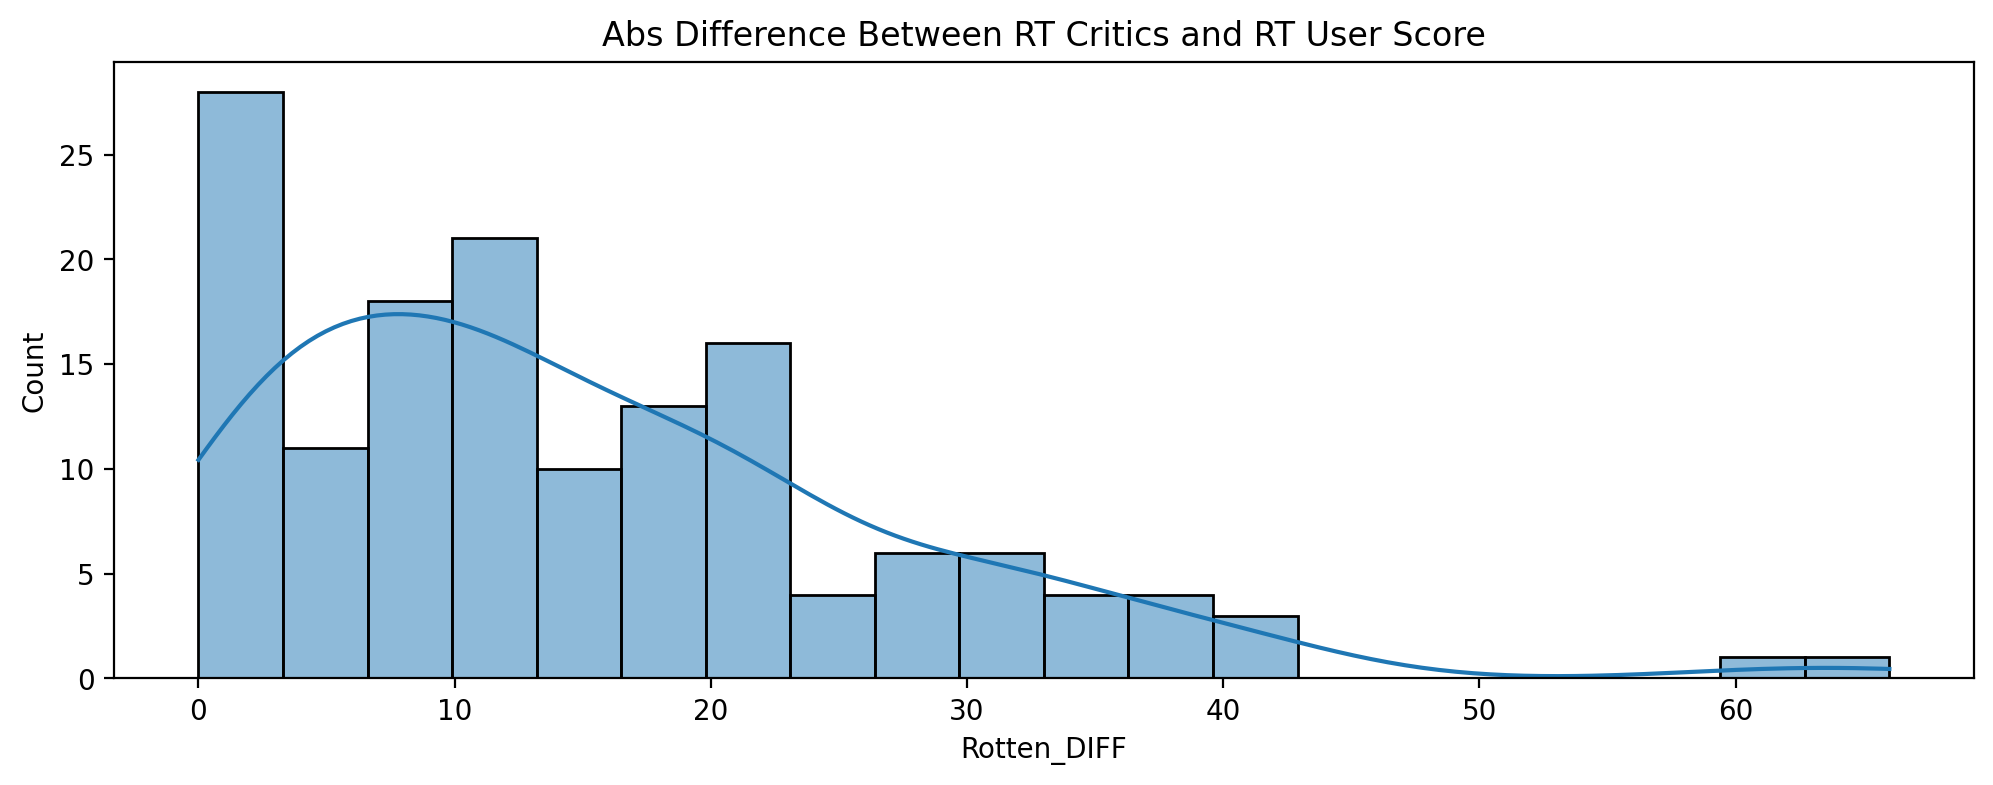

In [36]:
plt.figure(figsize=(12,4),dpi=200)
sns.histplot(data=all_sites,x=all_sites['Rotten_DIFF'].apply(abs),kde=True,bins=20)
plt.title("Abs Difference Between RT Critics and RT User Score")

Top 5 movies users rated higher than critics on average:

In [37]:
all_sites[['FILM','Rotten_DIFF']].nsmallest(n=5,columns='Rotten_DIFF')

,FILM,Rotten_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


Top 5 movies critics rated higher than users on average:

In [38]:
all_sites[['FILM','Rotten_DIFF']].nlargest(n=5,columns='Rotten_DIFF')

,FILM,Rotten_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Metacritic shows an average user rating versus their official displayed rating.

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

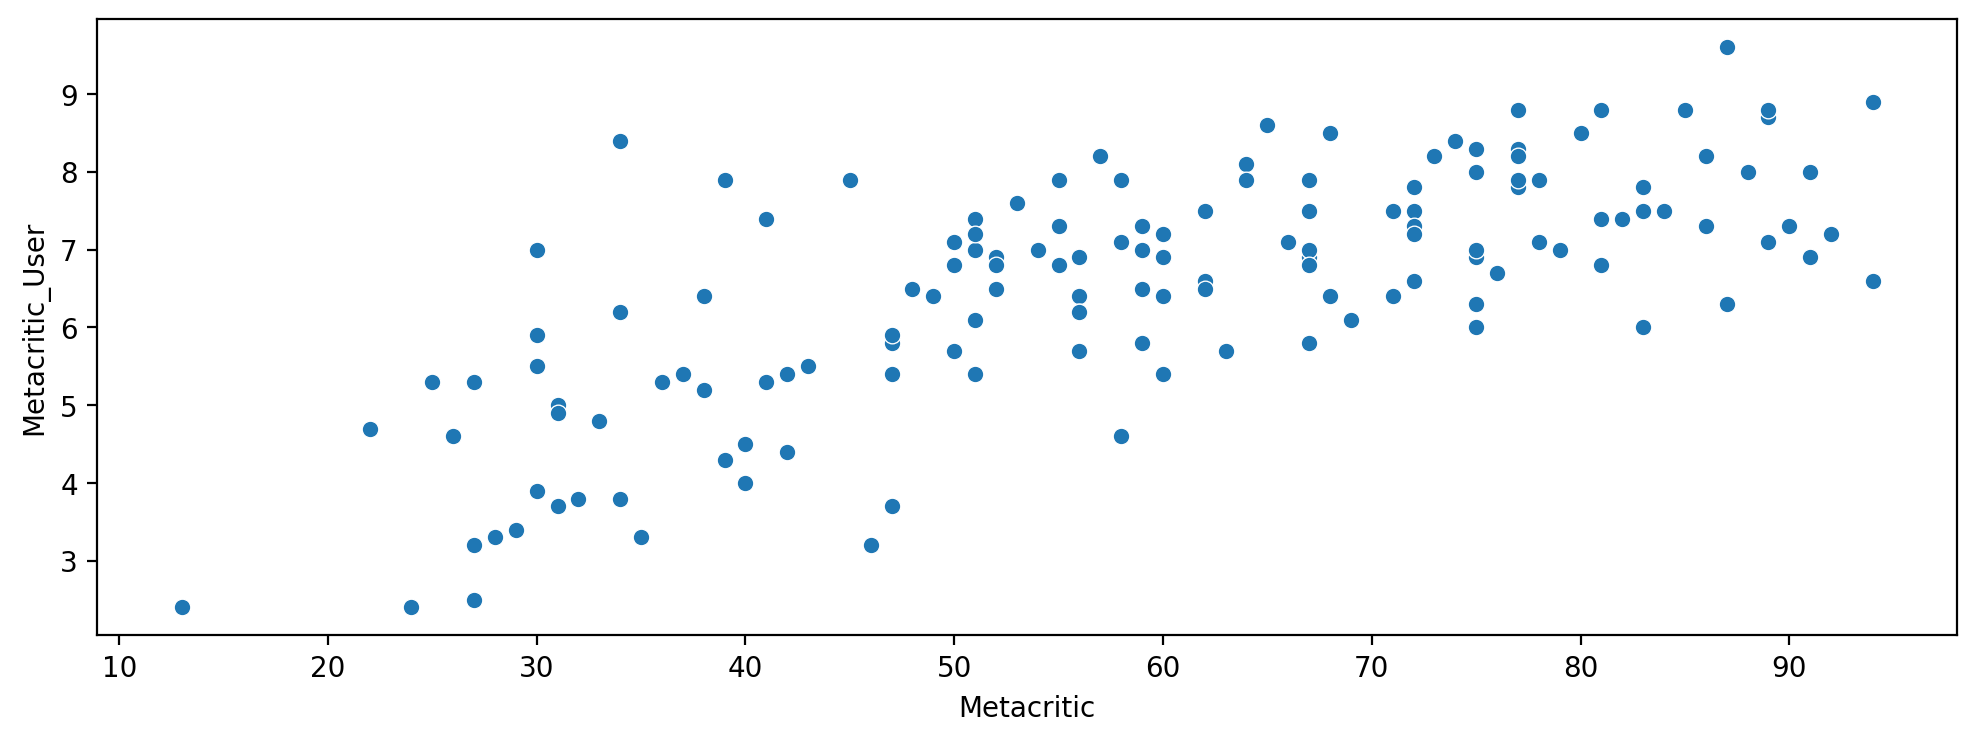

In [39]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')

## IMDB


Creating a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

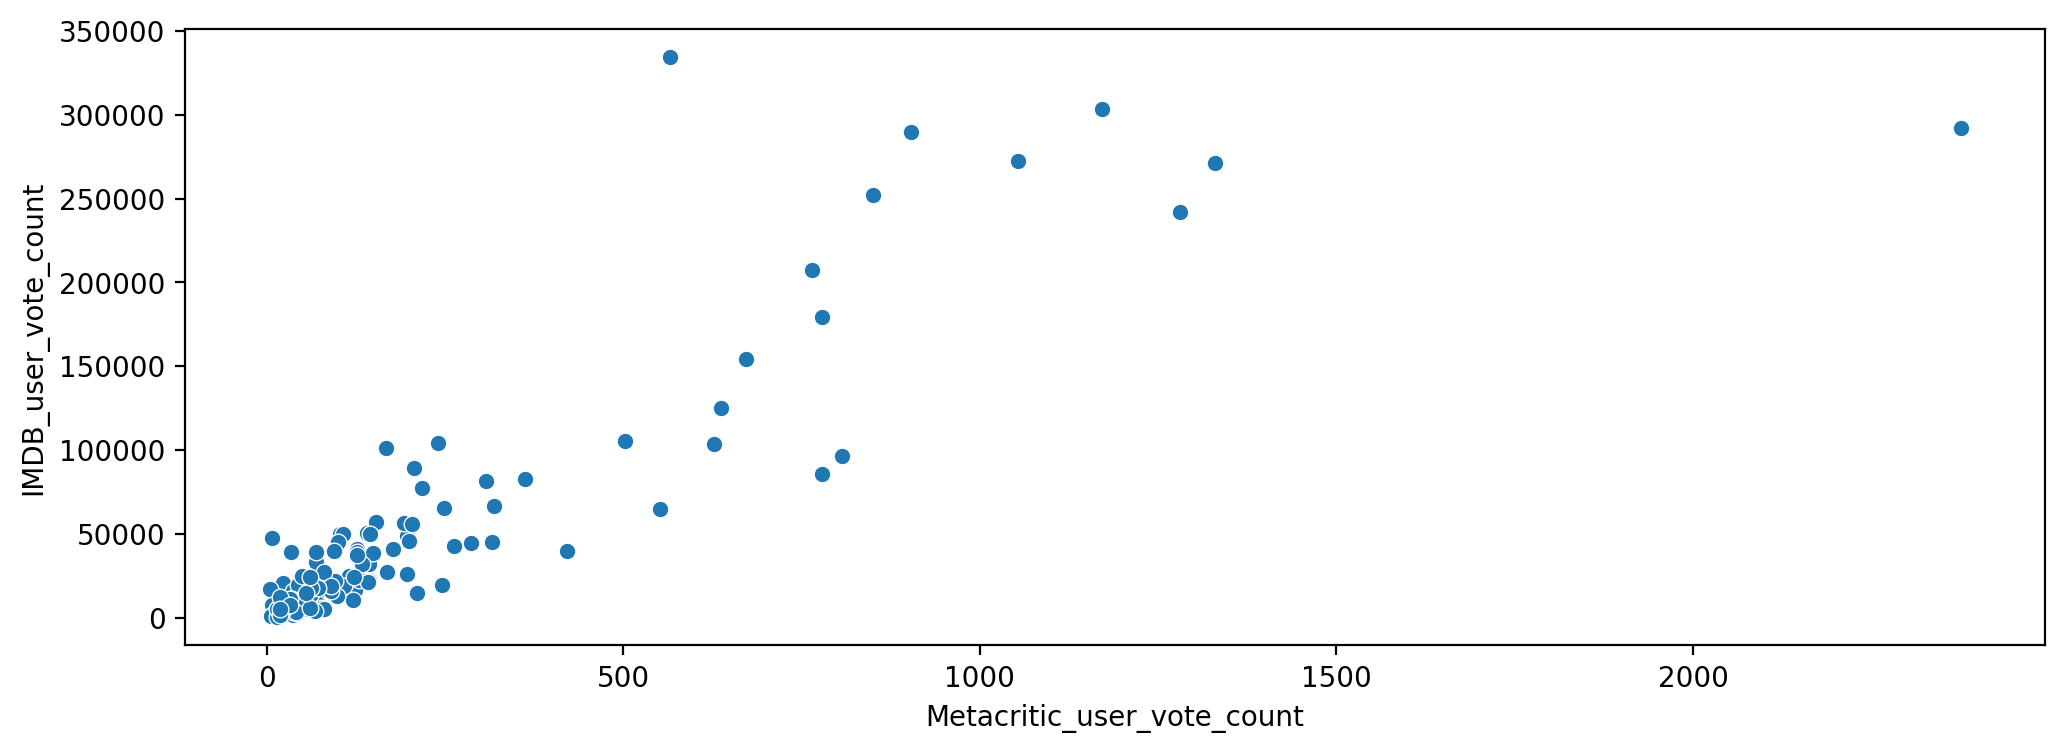

In [40]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**Highest IMDB User vote count**

In [41]:
all_sites.nlargest(n=1,columns='IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Highest Metacritic User vote count**

In [42]:
all_sites.nlargest(n=1,columns='Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandango Vs All Sites

Combining both dataframes based on movies in both dataframes

In [43]:
combined_data = pd.merge(reviewed,all_sites,how='inner',on='FILM')

In [44]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STAR_DIFF                   145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_DIFF                 145 non

In [45]:
combined_data.head()

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


**Normalize columns to Fandango STARS and RATINGS 0-5**

In [46]:
combined_data['IMDB_Norm'] = np.round(combined_data['IMDB']/2,1)
combined_data['Meta_User_Norm'] = np.round(combined_data['Metacritic_User']/2,1)
combined_data['RT_Norm'] = np.round(combined_data['RottenTomatoes']/20,1)
combined_data['RT_User_Norm'] = np.round(combined_data['RottenTomatoes_User']/20,1)
combined_data['Meta_Norm'] = np.round(combined_data['Metacritic']/20,1)

In [47]:
combined_data.head()

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF,IMDB_Norm,Meta_User_Norm,RT_Norm,RT_User_Norm,Meta_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,2.1,1.6,1.2,2.1,2.3
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,3.5,3.6,4.0,3.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.7,3.3,3.6,4.2,3.6
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,3.7,3.4,4.0,4.2,3.4
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.3,4.4,4.9,4.5,4.7


In [48]:
norm_rating = combined_data[['FILM','STARS','RATING','IMDB_Norm','Meta_User_Norm','RT_Norm','RT_User_Norm','Meta_Norm']]

In [49]:
norm_rating.head()

,FILM,STARS,RATING,IMDB_Norm,Meta_User_Norm,RT_Norm,RT_User_Norm,Meta_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,2.1,1.6,1.2,2.1,2.3
1,Jurassic World (2015),4.5,4.5,3.6,3.5,3.6,4.0,3.0
2,American Sniper (2015),5.0,4.8,3.7,3.3,3.6,4.2,3.6
3,Furious 7 (2015),5.0,4.8,3.7,3.4,4.0,4.2,3.4
4,Inside Out (2015),4.5,4.5,4.3,4.4,4.9,4.5,4.7


### Comparing Distribution across all sites

In [50]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

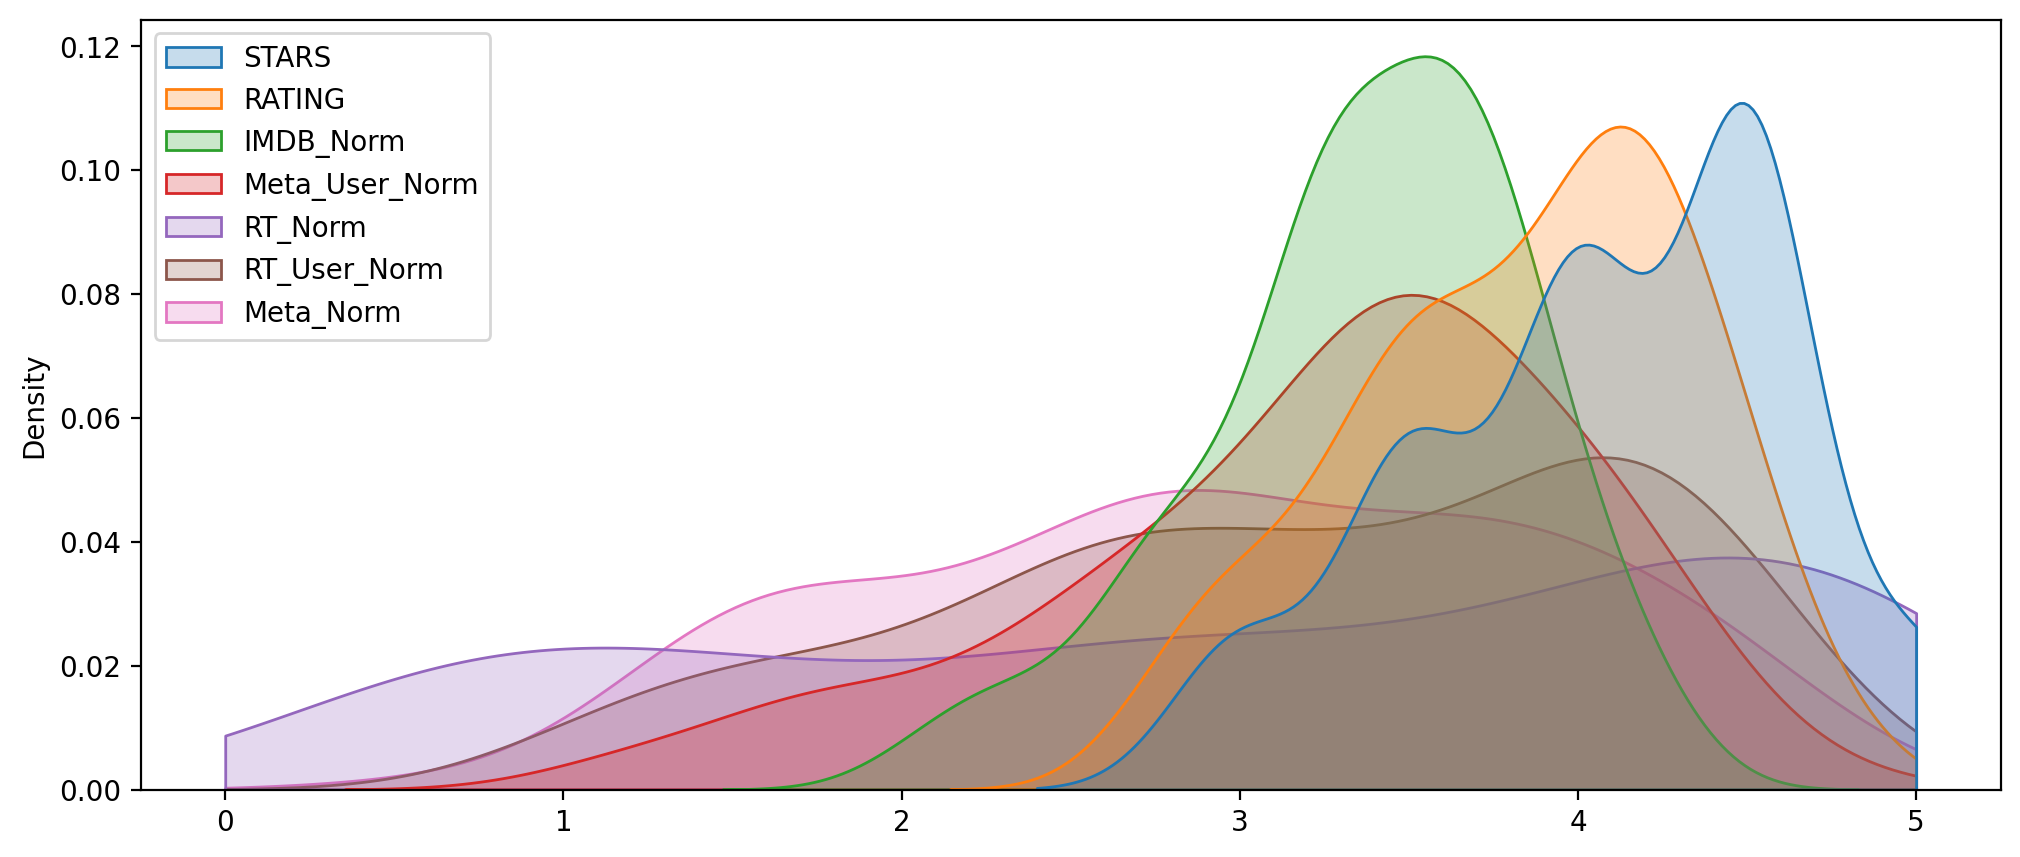

In [51]:
fig, ax = plt.subplots(figsize=(12,5),dpi=200)
sns.kdeplot(data=norm_rating,clip=[0,5],fill=True,ax=ax)
move_legend(ax, "upper left")


**Comparing RT Critics(as it has most unifrom distribution) and rating from fandango**

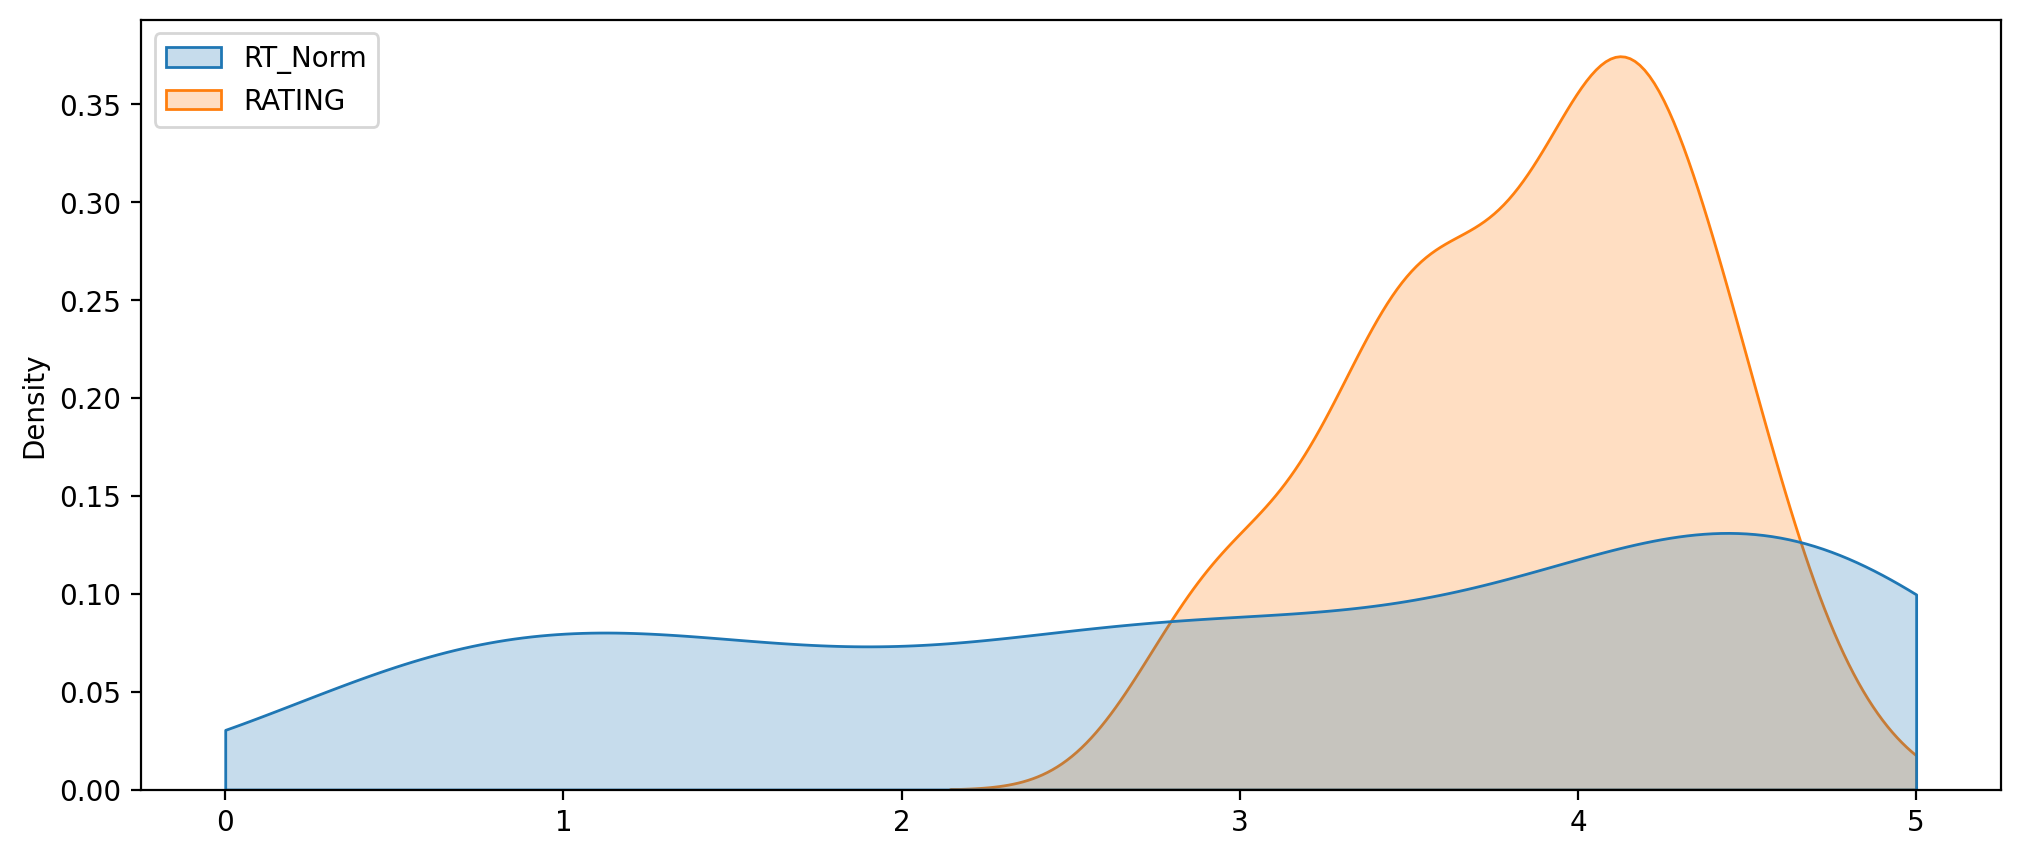

In [52]:
fig, ax = plt.subplots(figsize=(12,5),dpi=200)
sns.kdeplot(data=norm_rating[['RT_Norm','RATING']],clip=[0,5],fill=True,ax=ax)
move_legend(ax, 'upper left')

**Create a clustermap visualization of all normalized scores.**

In [53]:
films = norm_rating['FILM']

In [57]:
norm_rating = norm_rating.drop(labels='FILM',axis=1)

In [55]:
import scipy

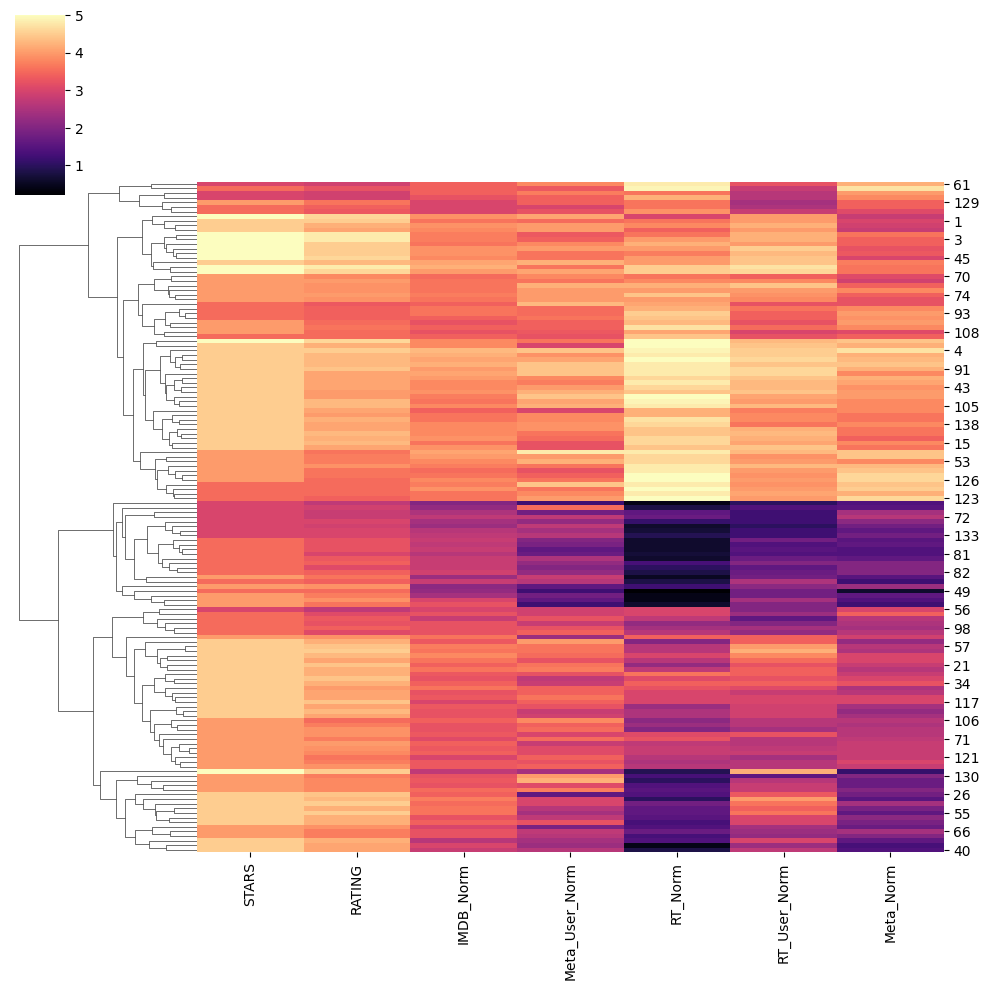

In [58]:
sns.clustermap(data=norm_rating,cmap='magma',col_cluster=False)

**Examining top 10 worst movies**

In [59]:
norm_rating['FILM'] = films

In [60]:
norm_rating.nsmallest(n=10,columns='RT_Norm')

,STARS,RATING,IMDB_Norm,Meta_User_Norm,RT_Norm,RT_User_Norm,Meta_Norm,FILM
49,3.5,3.5,2.2,1.2,0.2,1.8,0.6,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,3.0,2.3,0.4,2.3,1.3,Taken 3 (2015)
28,3.0,2.7,2.0,1.2,0.4,1.0,1.4,Fantastic Four (2015)
54,4.0,3.7,2.4,1.8,0.4,1.8,1.6,Hot Pursuit (2015)
84,4.0,3.9,3.0,1.6,0.4,2.4,1.4,Hitman: Agent 47 (2015)
50,4.0,3.6,2.3,2.8,0.5,1.8,1.5,The Boy Next Door (2015)
77,3.5,3.2,2.8,2.0,0.6,1.8,1.5,Seventh Son (2015)
78,3.5,3.2,2.8,1.6,0.6,1.5,1.4,Mortdecai (2015)
83,3.5,3.3,2.8,2.5,0.6,1.7,1.6,Sinister 2 (2015)
87,3.5,3.2,2.7,1.9,0.6,1.4,1.6,Unfinished Business (2015)


**Visualization of the distribution of ratings across all sites for the top 10 worst movies.**

Text(0.5, 1.0, "Rating for RT Critic's 10 Worst Reviewed Movies")

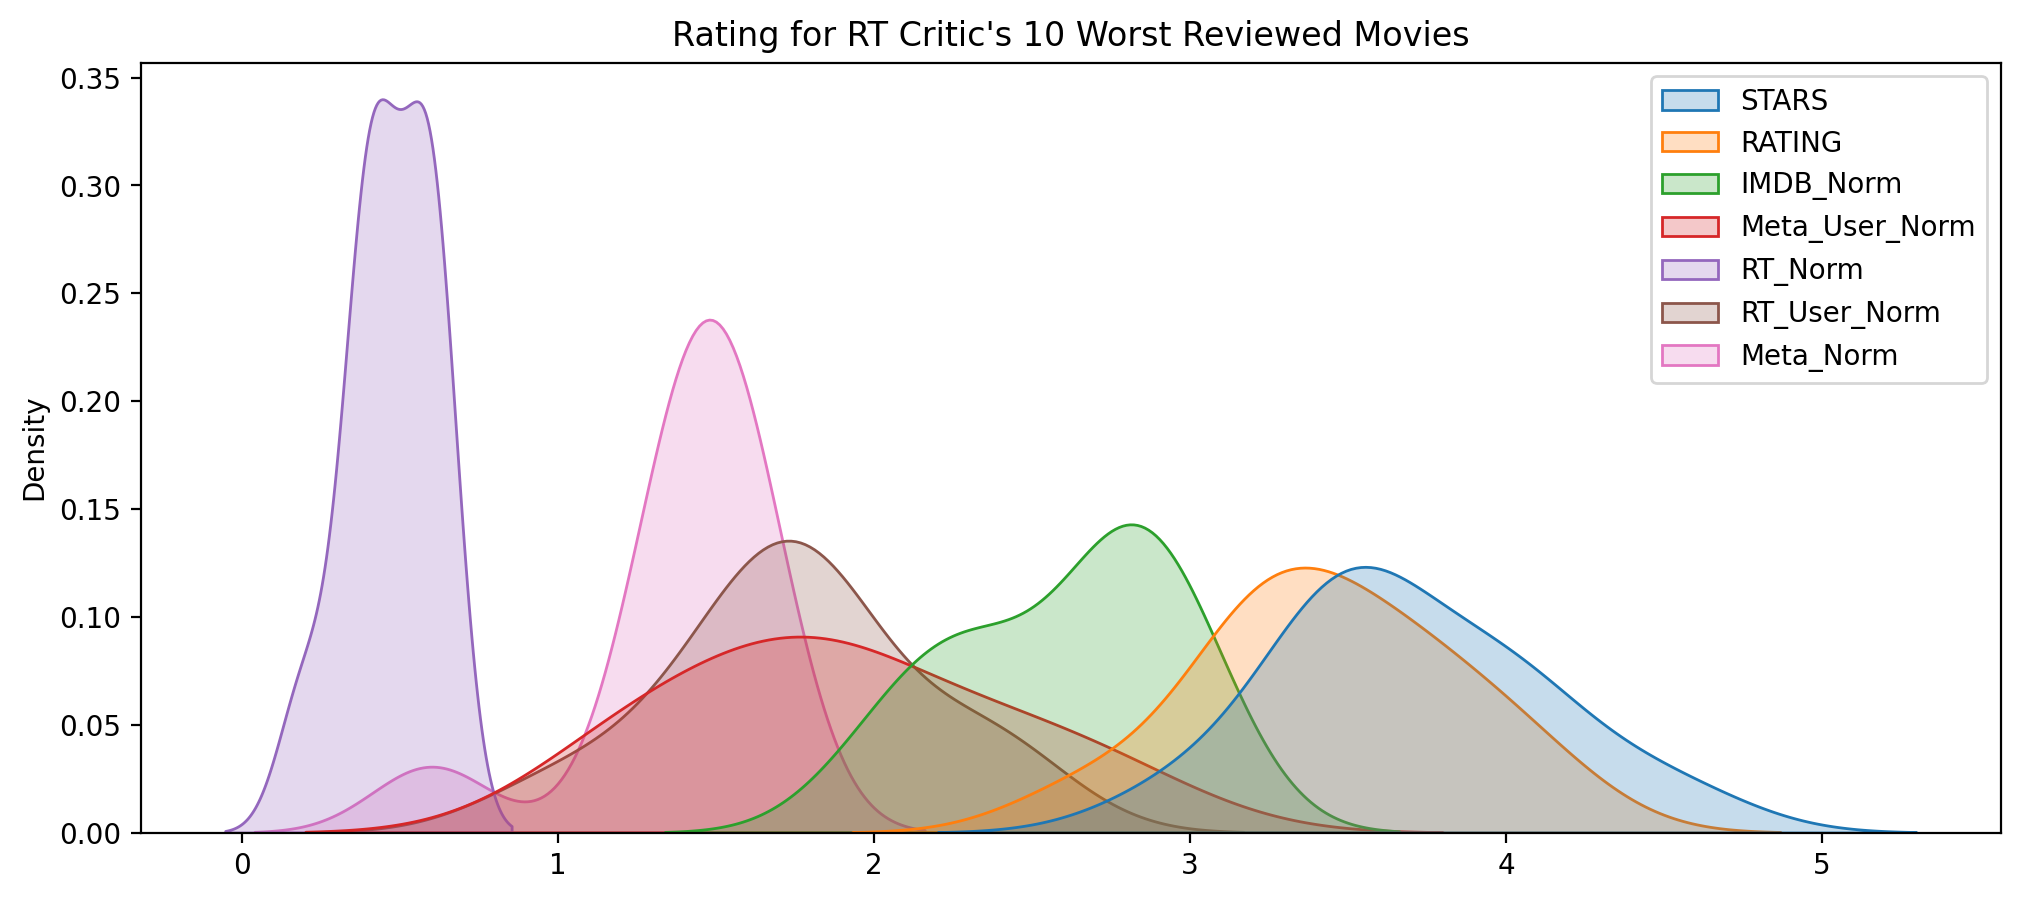

In [62]:
plt.figure(figsize=(12,5),dpi=200)
sns.kdeplot(data=norm_rating.nsmallest(n=10,columns='RT_Norm'),fill=True)

plt.title("Rating for RT Critic's 10 Worst Reviewed Movies")

## Conclusion

**Fandango's rating are biased**

In [65]:
norm_rating.iloc[25]

STARS                        4.5
RATING                       4.1
IMDB_Norm                    3.0
Meta_User_Norm               2.3
RT_Norm                      0.4
RT_User_Norm                 2.3
Meta_Norm                    1.3
FILM              Taken 3 (2015)
Name: 25, dtype: object

In [66]:
3.0+2.3+0.4+2.3+1.3

9.3

In [67]:
9.3/5

1.86

In [68]:
4.5-1.86

2.6399999999999997